In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv(r'C:\Users\ANKUSH\Desktop\AI ML\ML\Datasets\breast-cancer.csv')

In [4]:
df = data.copy()

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.shape

(569, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
df.drop('id',axis=1,inplace=True)

In [10]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

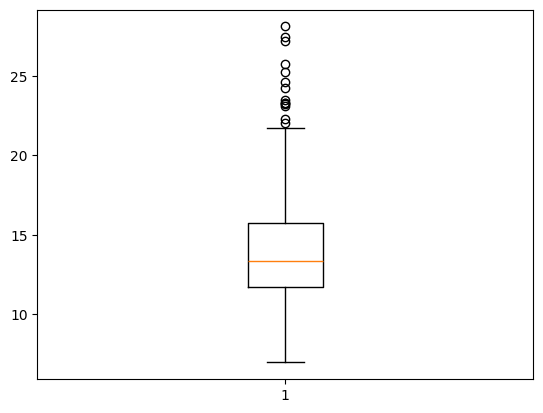

In [11]:
plt.boxplot(df['radius_mean'])
plt.show()

In [12]:
df['radius_mean'][df['radius_mean'] > df['radius_mean'].quantile(0.98)]

82     25.22
122    24.25
164    23.27
180    27.22
202    23.29
212    28.11
236    23.21
339    23.51
352    25.73
461    27.42
503    23.09
521    24.63
Name: radius_mean, dtype: float64

In [13]:
mean = np.mean(df['radius_mean'])
mean

14.127291739894552

In [14]:
perc25 = df['radius_mean'].quantile(0.25)
perc75 = df['radius_mean'].quantile(0.75)

In [15]:
print(perc25)
print(perc75)

11.7
15.78


In [16]:
iqr = perc75-perc25

In [17]:
upper = perc75 + (1.5 * iqr)
lower = perc25 - (1.5 * iqr)
print(upper)
print(lower)

21.9
5.579999999999999


In [18]:
df['radius_mean'] = np.where((df['radius_mean'] > upper), mean,df['radius_mean'])

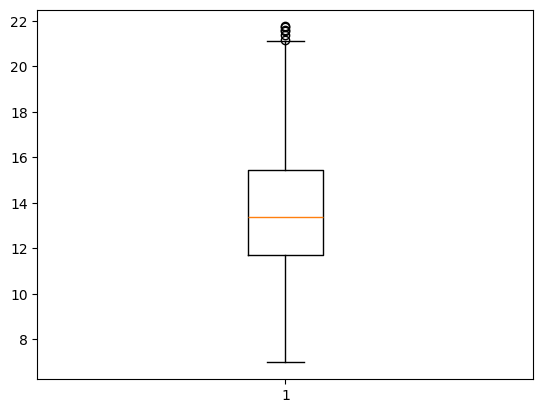

In [19]:
plt.boxplot(df['radius_mean'])
plt.show()

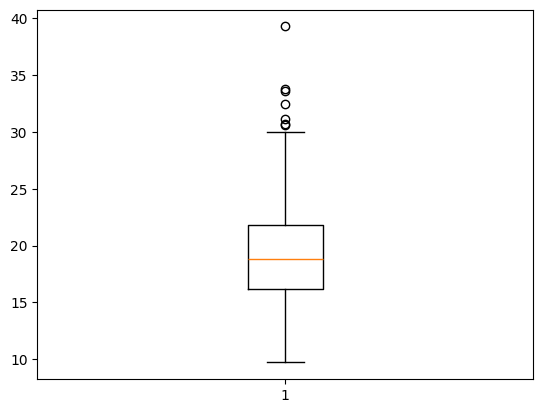

In [20]:
plt.boxplot(df['texture_mean'])
plt.show()

In [21]:
df['texture_mean'][df['texture_mean']> df['texture_mean'].quantile(0.98)]

219    32.47
232    33.81
239    39.28
259    33.56
265    31.12
414    29.81
455    30.72
473    29.97
552    29.43
561    29.37
562    30.62
567    29.33
Name: texture_mean, dtype: float64

In [22]:
dummy = df['texture_mean']

In [23]:
ls = list(map(lambda x : int(dummy.mean()) if x>29.33 else x , dummy))

In [24]:
ls

[10.38,
 17.77,
 21.25,
 20.38,
 14.34,
 15.7,
 19.98,
 20.83,
 21.82,
 24.04,
 23.24,
 17.89,
 24.8,
 23.95,
 22.61,
 27.54,
 20.13,
 20.68,
 22.15,
 14.36,
 15.71,
 12.44,
 14.26,
 23.04,
 21.38,
 16.4,
 21.53,
 20.25,
 25.27,
 15.05,
 25.11,
 18.7,
 23.98,
 26.47,
 17.88,
 21.59,
 21.72,
 18.42,
 25.2,
 20.82,
 21.58,
 21.35,
 24.81,
 20.28,
 21.81,
 17.6,
 16.84,
 18.66,
 14.63,
 22.3,
 21.6,
 16.34,
 18.24,
 18.7,
 22.02,
 18.75,
 18.57,
 21.59,
 19.31,
 11.79,
 14.88,
 20.98,
 22.15,
 13.86,
 23.84,
 23.94,
 21.01,
 19.04,
 17.33,
 16.49,
 21.31,
 14.64,
 24.52,
 15.79,
 16.52,
 19.65,
 10.94,
 16.15,
 23.97,
 18.0,
 20.97,
 15.86,
 24.91,
 26.29,
 15.65,
 18.52,
 21.46,
 24.59,
 21.8,
 15.24,
 24.02,
 22.76,
 14.76,
 18.3,
 19.83,
 23.03,
 17.84,
 19.94,
 12.84,
 19.77,
 24.98,
 13.43,
 20.52,
 19.4,
 19.29,
 15.56,
 18.33,
 18.54,
 19.67,
 21.26,
 16.99,
 20.76,
 19.65,
 20.19,
 15.83,
 21.53,
 15.76,
 16.67,
 22.91,
 20.01,
 10.82,
 17.12,
 20.2,
 10.89,
 16.39,
 17.21,
 24.69

In [25]:
max(ls)

29.33

In [26]:
df['texture_mean'] = ls

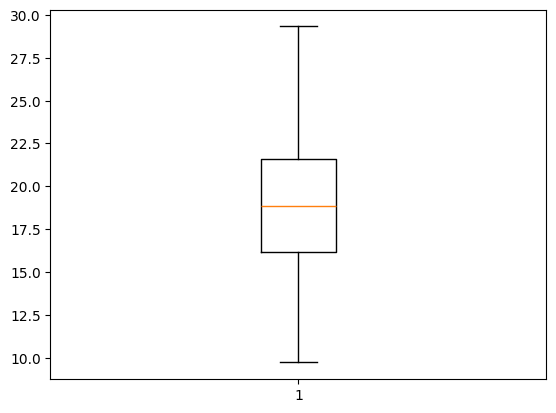

In [27]:
plt.boxplot(df['texture_mean'])
plt.show()

In [28]:
scaler = StandardScaler()

In [29]:
df.iloc[:,1:] = scaler.fit_transform(df.iloc[:,1:])

In [30]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,1.329983,-2.220555,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,M,2.163175,-0.325989,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,M,1.878986,0.566174,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,M,-0.791749,0.343133,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,M,2.072751,-1.205334,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()

In [33]:
le.fit_transform(df.iloc[:,0])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [38]:
pca = PCA(n_components=5)

In [39]:
x = pca.fit_transform(df.drop('diagnosis',axis=1))

In [40]:
y = df['diagnosis']

In [41]:
pca.components_

array([[ 0.18746319,  0.11208028,  0.22679638,  0.21941608,  0.14477392,
         0.24216148,  0.2601654 ,  0.26186713,  0.14092354,  0.06753693,
         0.20495787,  0.0178414 ,  0.21045292,  0.20080067,  0.01527272,
         0.1734219 ,  0.15626164,  0.18615459,  0.04363668,  0.10535998,
         0.2274312 ,  0.10545845,  0.236246  ,  0.22363756,  0.13054288,
         0.21333949,  0.23172427,  0.25295864,  0.1258402 ,  0.1355114 ],
       [-0.22391459, -0.05016065, -0.22145236, -0.23517563,  0.18414194,
         0.14661701,  0.05541554, -0.04056617,  0.18746518,  0.36848283,
        -0.10546224,  0.09473337, -0.08924457, -0.15112252,  0.2108143 ,
         0.23123519,  0.19563756,  0.1266347 ,  0.18767858,  0.28122577,
        -0.226911  , -0.04856821, -0.20679427, -0.2242724 ,  0.16852153,
         0.13645794,  0.09039991, -0.01689066,  0.1358972 ,  0.27141272],
       [-0.06640705,  0.07598353, -0.00167249,  0.03795785, -0.10517149,
        -0.07502779,  0.00436102, -0.02109211, -0

In [42]:
pca.explained_variance_

array([13.15362217,  5.6417711 ,  2.8382534 ,  1.88813134,  1.65777596])

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfc = RandomForestClassifier()

In [45]:
rfc.fit(x,y)

RandomForestClassifier()

In [46]:
rfc.score(x,y)

1.0

In [49]:
var = df.iloc[145,1:]
var

radius_mean               -0.636737
texture_mean               -1.12586
perimeter_mean            -0.570856
area_mean                 -0.631644
smoothness_mean            1.340737
compactness_mean           0.478696
concavity_mean            -0.649083
concave points_mean       -0.487226
symmetry_mean              0.669515
fractal_dimension_mean     2.210384
radius_se                 -0.032382
texture_se                -1.021573
perimeter_se                 0.0767
area_se                   -0.336782
smoothness_se              1.043049
compactness_se             1.225762
concavity_se              -0.132751
concave points_se          -0.11292
symmetry_se                1.298894
fractal_dimension_se       2.128835
radius_worst               -0.64593
texture_worst             -1.492825
perimeter_worst           -0.625539
area_worst                -0.652156
smoothness_worst           0.439736
compactness_worst         -0.016317
concavity_worst           -0.853904
concave points_worst      -0

In [50]:
new_ob = pca.transform([var])

C:\Users\ANKUSH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [51]:
rfc.predict(new_ob)

array(['B'], dtype=object)